In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!touch .kaggle/kaggle.json

touch: cannot touch '.kaggle/kaggle.json': No such file or directory


In [ ]:
# Upload kaggle.json
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}"'.format(
      name=fn))


Saving kaggle (1).json to kaggle (1).json
User uploaded file "kaggle (1).json"


In [ ]:
 #Ubah permission file
!chmod 600 /content/kaggle.json


In [ ]:
# Setup Kaggle environment
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
# Download dataset
!kaggle datasets download -d alxmamaev/flowers-recognition

 90% 203M/225M [00:00<00:00, 221MB/s]
100% 225M/225M [00:01<00:00, 222MB/s]


In [ ]:
# melakukan ekstraksi pada file zip
import zipfile
local_zip = 'flowers-recognition.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/flowers-recognition/')
zip_ref.close()



In [ ]:
# Menghapus berkas zip yang sudah tidak diperlukan
!rm flowers-recognition.zip

In [ ]:
# Mendefinisikan direktori utama dataset
base_dir = '/content/flowers-recognition/flowers'

In [ ]:
print(os.listdir(base_dir))

['dandelion', 'tulip', 'sunflower', 'daisy', 'rose']


In [ ]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

Total Files : 4317


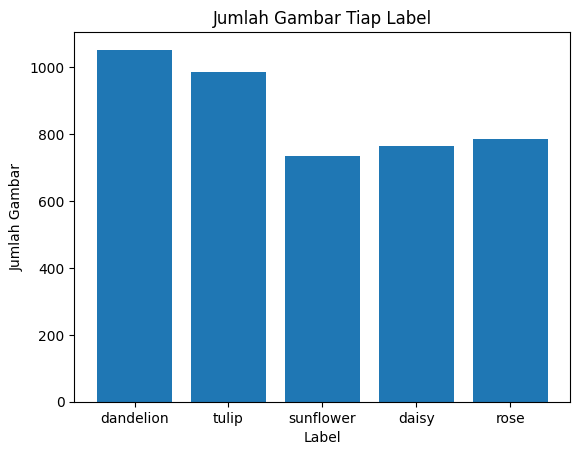

In [ ]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt

plt.bar(number_label.keys(), number_label.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

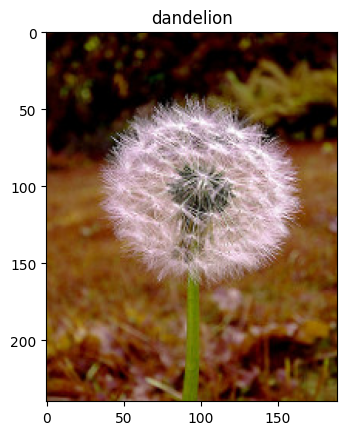

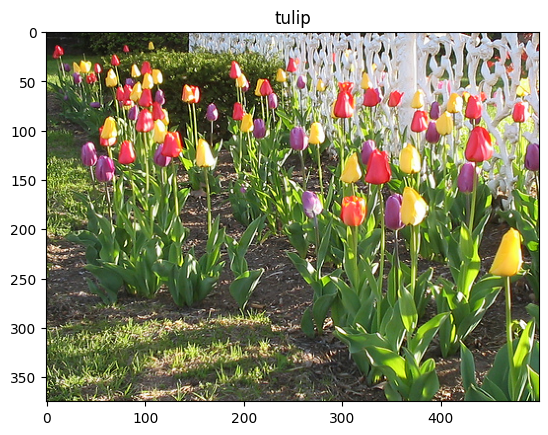

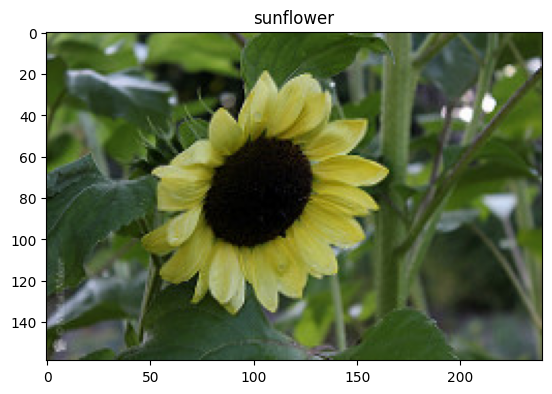

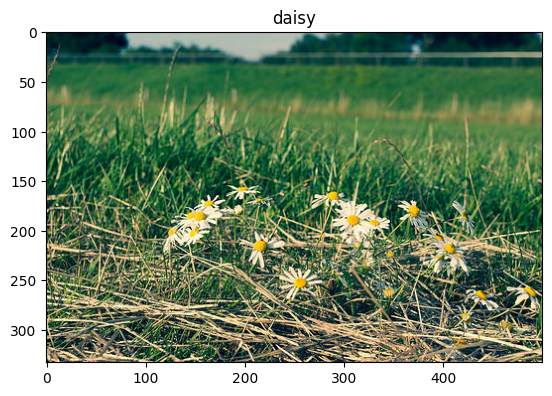

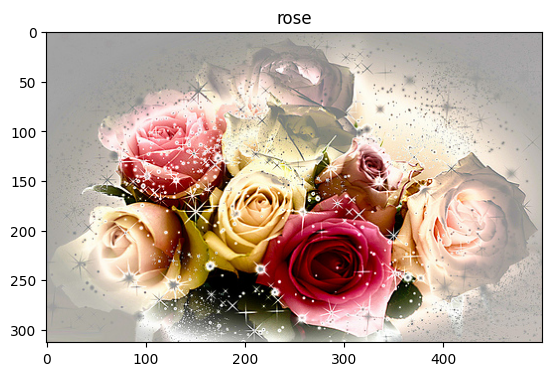

In [ ]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

In [ ]:
IMAGE_SIZE = (200,200)
BATCH_SIZE = 32
SEED = 999


In [ ]:
# Menggunakan ImageDataGenerator untuk preprocessing
import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2
)

In [ ]:
# Menyiapkan data train dan data validation
train_data = datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    subset='training',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

valid_data = datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    subset='validation',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [ ]:
# Image Augmentation
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(IMAGE_SIZE[0],
                                  IMAGE_SIZE[1],
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.Rescaling(1./255)
  ]
)

In [ ]:
# Membuat arsitektur model CNN
cnn_model = tf.keras.models.Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

In [ ]:
# Training model CNN
cnn_hist = cnn_model.fit(
    train_data,
    epochs=20,
    validation_data = valid_data
)

Epoch 1/20
109/109 [==============================] - 31s 174ms/step - loss: 1.2995 - accuracy: 0.4356 - val_loss: 1.1831 - val_accuracy: 0.5488
Epoch 2/20
109/109 [==============================] - 16s 150ms/step - loss: 1.0464 - accuracy: 0.5895 - val_loss: 1.0151 - val_accuracy: 0.5767
Epoch 3/20
109/109 [==============================] - 17s 158ms/step - loss: 0.9503 - accuracy: 0.6352 - val_loss: 0.9772 - val_accuracy: 0.6198
Epoch 4/20
109/109 [==============================] - 17s 154ms/step - loss: 0.8842 - accuracy: 0.6610 - val_loss: 0.9065 - val_accuracy: 0.6500
Epoch 5/20
109/109 [==============================] - 16s 148ms/step - loss: 0.8275 - accuracy: 0.6833 - val_loss: 0.9752 - val_accuracy: 0.6221
Epoch 6/20
109/109 [==============================] - 17s 156ms/step - loss: 0.8262 - accuracy: 0.6763 - val_loss: 1.0356 - val_accuracy: 0.6128
Epoch 7/20
109/109 [==============================] - 16s 150ms/step - loss: 0.8521 - accuracy: 0.6723 - val_loss: 0.9202 - val_ac

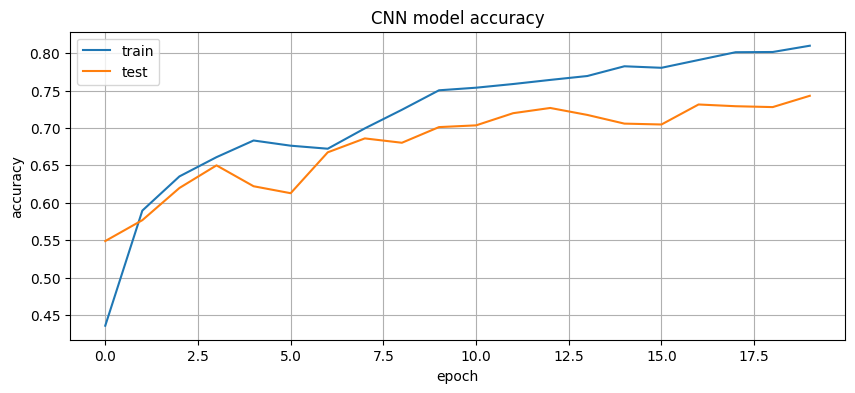

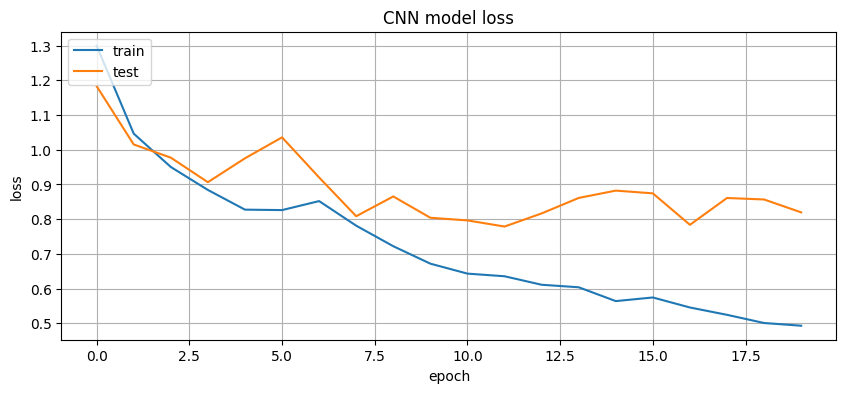

In [ ]:
 #Membuat plot akurasi model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['accuracy'])
plt.plot(cnn_hist.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()
# Membuat plot loss model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['loss'])
plt.plot(cnn_hist.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16

## Loading VGG16 model
base_vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
base_vgg_model.trainable = False

# Preprocessing Input
vgg_preprocess = tf.keras.applications.vgg16.preprocess_input
train_data.preprocessing_function = vgg_preprocess


58889256/58889256 [==============================] - 5s 0us/step


In [ ]:
# Transfer learning dengan VGG16
vgg_model = tf.keras.models.Sequential([
  data_augmentation,
  base_vgg_model,
  tf.keras.layers.Dropout(0.7),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )


In [ ]:
# Melatih model VGG16
vgg_hist = vgg_model.fit(
    train_data,
    epochs=20,
    validation_data = valid_data
)


Epoch 1/20
109/109 [==============================] - 30s 220ms/step - loss: 1.0872 - accuracy: 0.5811 - val_loss: 0.6927 - val_accuracy: 0.7488
Epoch 2/20
109/109 [==============================] - 20s 184ms/step - loss: 0.7738 - accuracy: 0.7220 - val_loss: 0.6723 - val_accuracy: 0.7570
Epoch 3/20
109/109 [==============================] - 20s 180ms/step - loss: 0.6996 - accuracy: 0.7330 - val_loss: 0.5938 - val_accuracy: 0.7826
Epoch 4/20
109/109 [==============================] - 20s 181ms/step - loss: 0.6920 - accuracy: 0.7480 - val_loss: 0.5706 - val_accuracy: 0.8035
Epoch 5/20
109/109 [==============================] - 19s 178ms/step - loss: 0.6538 - accuracy: 0.7599 - val_loss: 0.5702 - val_accuracy: 0.7977
Epoch 6/20
109/109 [==============================] - 20s 182ms/step - loss: 0.5960 - accuracy: 0.7793 - val_loss: 0.5482 - val_accuracy: 0.8151
Epoch 7/20
109/109 [==============================] - 21s 193ms/step - loss: 0.5991 - accuracy: 0.7741 - val_loss: 0.5252 - val_ac

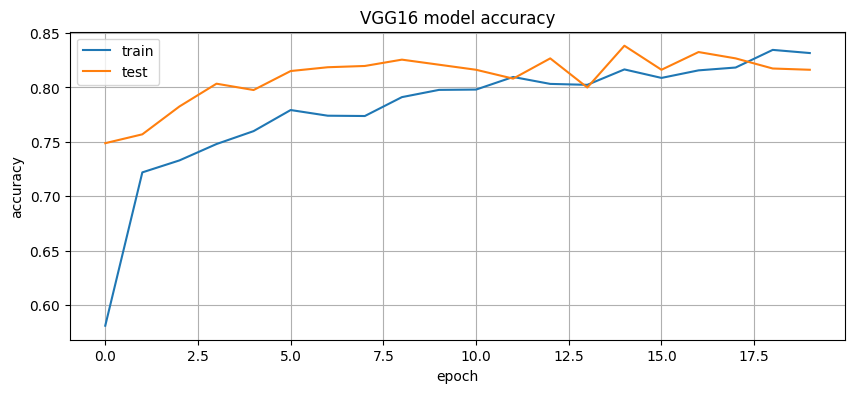

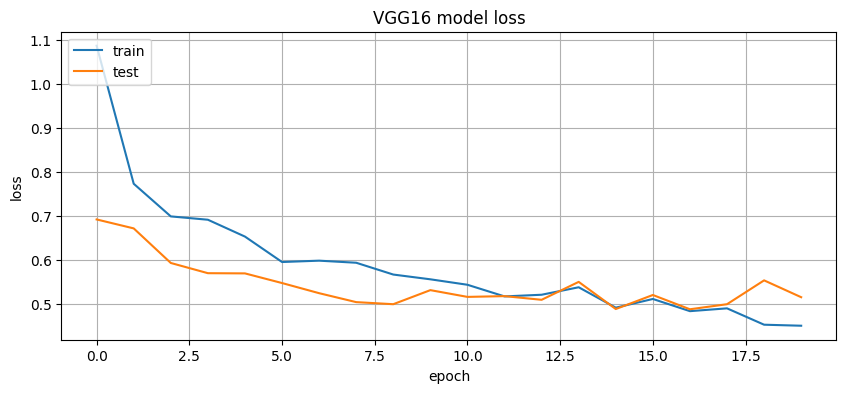

In [ ]:
# Membuat plot akurasi model VGG16
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['accuracy'])
plt.plot(vgg_hist.history['val_accuracy'])
plt.title('VGG16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model VGG16
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['loss'])
plt.plot(vgg_hist.history['val_loss'])
plt.title('VGG16 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.applications import ResNet50

# Loading ResNet50 model
base_resnet_model = ResNet50(include_top=False,
                   input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3),
                   pooling='max',classes=5,
                   weights='imagenet')

base_resnet_model.trainable = False

train_data.preprocessing_function = tf.keras.applications.resnet50.preprocess_input


# Transfer learning ResNet50
resnet_model = tf.keras.models.Sequential([
    data_augmentation,
    base_resnet_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# Compiling model
resnet_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )


In [ ]:
# Melatih model ResNet50
resnet_hist = resnet_model.fit(
    train_data,
    epochs=20,
    validation_data = valid_data
)

Epoch 1/20
109/109 [==============================] - 26s 185ms/step - loss: 1.6912 - accuracy: 0.2728 - val_loss: 1.4959 - val_accuracy: 0.3616
Epoch 2/20
109/109 [==============================] - 18s 163ms/step - loss: 1.5722 - accuracy: 0.2901 - val_loss: 1.4653 - val_accuracy: 0.3593
Epoch 3/20
109/109 [==============================] - 20s 180ms/step - loss: 1.5244 - accuracy: 0.3240 - val_loss: 1.5535 - val_accuracy: 0.3384
Epoch 4/20
109/109 [==============================] - 18s 167ms/step - loss: 1.5260 - accuracy: 0.3225 - val_loss: 1.4213 - val_accuracy: 0.4070
Epoch 5/20
109/109 [==============================] - 18s 164ms/step - loss: 1.5285 - accuracy: 0.3445 - val_loss: 1.5103 - val_accuracy: 0.3884
Epoch 6/20
109/109 [==============================] - 19s 172ms/step - loss: 1.5071 - accuracy: 0.3364 - val_loss: 1.4666 - val_accuracy: 0.3721
Epoch 7/20
109/109 [==============================] - 18s 160ms/step - loss: 1.4949 - accuracy: 0.3645 - val_loss: 1.4799 - val_ac

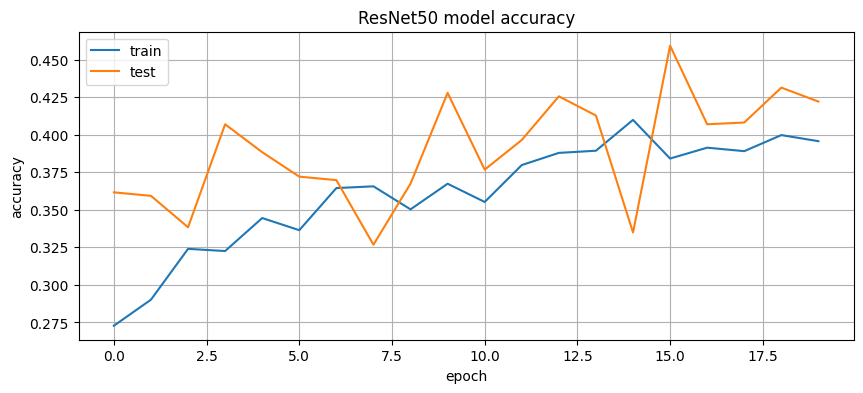

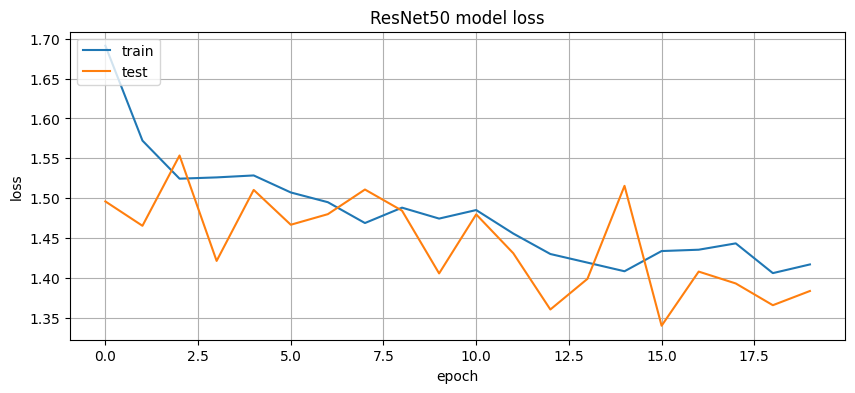

In [ ]:
# Membuat plot akurasi model ResNet50
plt.figure(figsize=(10,4))
plt.plot(resnet_hist.history['accuracy'])
plt.plot(resnet_hist.history['val_accuracy'])
plt.title('ResNet50 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model ResNet50
plt.figure(figsize=(10,4))
plt.plot(resnet_hist.history['loss'])
plt.plot(resnet_hist.history['val_loss'])
plt.title('ResNet50 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# Loading DenseNet201 model
base_densenet_model = tf.keras.applications.DenseNet201(include_top=False,
                                                        weights='imagenet',
                                                        input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
                                                        pooling='max')
base_densenet_model.trainable=False
train_data.preprocessing_function = tf.keras.applications.densenet.preprocess_input


74836368/74836368 [==============================] - 0s 0us/step


In [ ]:
# Transfer learning DenseNet201
densenet_model = tf.keras.models.Sequential([
  data_augmentation,
  base_densenet_model,
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Compiling model
densenet_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

In [ ]:
# Melatih model DenseNet201
densenet_hist = densenet_model.fit(
    train_data,
    epochs=20,
    validation_data = valid_data
)


Epoch 1/20
109/109 [==============================] - 48s 247ms/step - loss: 0.8584 - accuracy: 0.6743 - val_loss: 0.5328 - val_accuracy: 0.8081
Epoch 2/20
109/109 [==============================] - 21s 190ms/step - loss: 0.4967 - accuracy: 0.8212 - val_loss: 0.4451 - val_accuracy: 0.8488
Epoch 3/20
109/109 [==============================] - 19s 173ms/step - loss: 0.4203 - accuracy: 0.8467 - val_loss: 0.3843 - val_accuracy: 0.8651
Epoch 4/20
109/109 [==============================] - 20s 181ms/step - loss: 0.3706 - accuracy: 0.8617 - val_loss: 0.4432 - val_accuracy: 0.8453
Epoch 5/20
109/109 [==============================] - 21s 191ms/step - loss: 0.3809 - accuracy: 0.8580 - val_loss: 0.3890 - val_accuracy: 0.8698
Epoch 6/20
109/109 [==============================] - 20s 180ms/step - loss: 0.3209 - accuracy: 0.8843 - val_loss: 0.3486 - val_accuracy: 0.8744
Epoch 7/20
109/109 [==============================] - 20s 183ms/step - loss: 0.3451 - accuracy: 0.8742 - val_loss: 0.4120 - val_ac

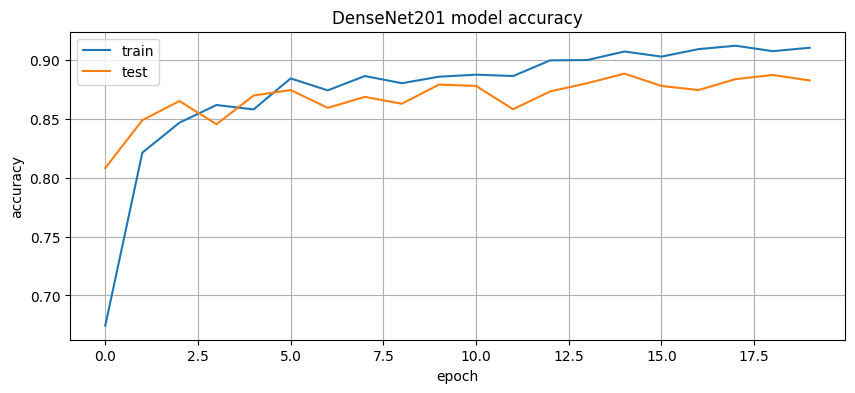

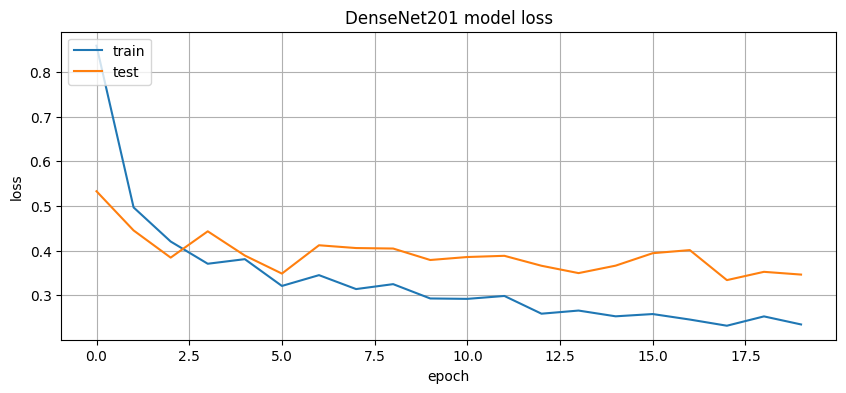

In [ ]:
# Membuat plot akurasi model DenseNet201
plt.figure(figsize=(10,4))
plt.plot(densenet_hist.history['accuracy'])
plt.plot(densenet_hist.history['val_accuracy'])
plt.title('DenseNet201 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model DenseNet201
plt.figure(figsize=(10,4))
plt.plot(densenet_hist.history['loss'])
plt.plot(densenet_hist.history['val_loss'])
plt.title('DenseNet201 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

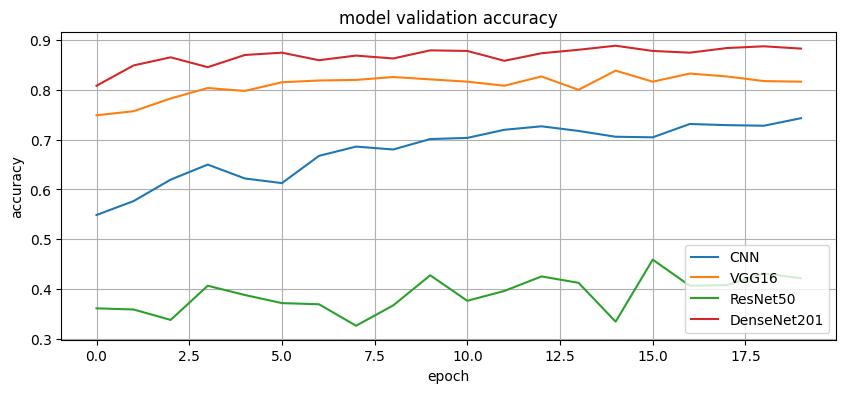

In [ ]:
# Membuat plot akurasi empat model sebelumnya untuk dibandingkan
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['val_accuracy'])
plt.plot(vgg_hist.history['val_accuracy'])
plt.plot(resnet_hist.history['val_accuracy'])
plt.plot(densenet_hist.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN', 'VGG16', 'ResNet50', 'DenseNet201'], loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Menampilkan daftar kelas atau label gambar
train_data.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

Saving 21652746_cc379e0eea_m.jpg to 21652746_cc379e0eea_m (1).jpg
1/1 [==============================] - 4s 4s/step
21652746_cc379e0eea_m.jpg
daisy


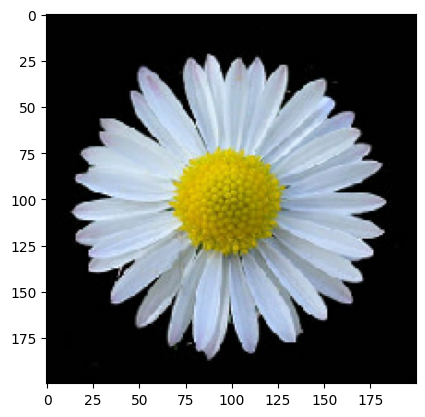

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from google.colab import files
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=IMAGE_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = densenet_model.predict(images, batch_size=BATCH_SIZE)
  classes = np.argmax(classes)

  print(fn)
  if classes==0:
    print('daisy')
  elif classes==1:
    print('dandelion')
  elif classes==2:
    print('rose')
  elif classes==3:
    print('sunflower')
  else:
    print('tulip')

In [ ]:
pip install keras tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
